In [2]:
import random

In [3]:
X1 = []
X2 = []
Y = []

for i in range(50):
  X1.append(random.randint(0, 100))
  X2.append(random.randint(0, 100))
  if (X1[i] > X2[i]):
    Y.append(1)
  else:
    Y.append(0)

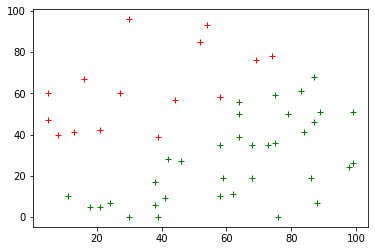

In [4]:
import matplotlib.pyplot as plt

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")

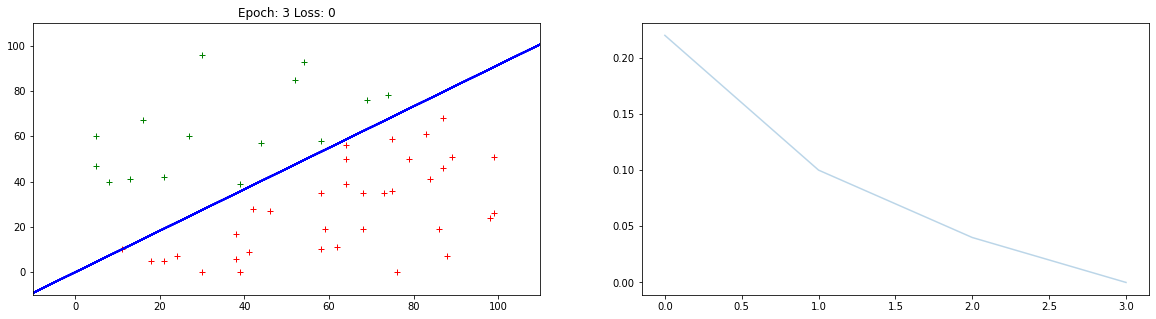

Epoch: 3 Loss: 0.0


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
from scipy.signal import savgol_filter


W = [random.random(), random.random()]
b = random.random()


lr = 0.1
theta=0.5

epoch = 0
count = 0


loss = []

while count < len(X1):
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    loss.append(1/len(X1)*total_error)
    
    plt.figure(figsize=(20,5))
       
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    
    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "g+")
        else:
            plt.plot(X1[i], X2[i], "r+")

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr=(theta-b)/W[0]
        yintr=(theta-b)/W[1]

        slope = -yintr/xintr
        xx = plt.xlim()
#                 print(xx)
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3)
        plt.plot(yhat, 'r--', lw=3)

    plt.show()
            
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1
